In [1]:
from b2heavy.TwoPointFunctions.utils     import correlation_diagnostics
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, plot_effective_coeffs
from b2heavy.TwoPointFunctions.fitter    import StagFitter

import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt

In [2]:
# binSizes  = {'MediumCoarse':13,
#              'Coarse-2':    16,
#              'Coarse-1':    11,
#              'Coarse-Phys': 19,
#              'Fine-1':      16,
#              'Fine-Phys':   16,
#              'SuperFine':   22}#22}

In the following section, we set all the parameter for the analysis

In [3]:
# Correlator specifics
ENSEMBLE = 'Coarse-1'
MESON    = 'Dst'
MOMENTUM = '000'

DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'

BINSIZE  = 13
SMSLIST  = ['1S-1S','d-d','d-1S']

# Correlation matrix specifics
DIAG   = False
BLOCK  = False
SCALE  = True
SHRINK = True
SVD    = 1e-12

# Specifics of the analysis
TRANGE_EFF = (10,18) 
TRANGE     = (4,18)
NSTATES    = 3
WPRIORS    = True
JKFIT      = False

In the following cell, we initialize the objects of `b2heavy` that read the data and format them

In [4]:
io   = CorrelatorIO(ENSEMBLE,MESON,MOMENTUM,PathToDataDir=DATA_DIR)
stag = StagFitter(
    io       = io,
    jkBin    = BINSIZE,
    smearing = SMSLIST
)

We also initialize the instruction to build the covariance matrix

In [5]:
cov_specs = dict(
    diag   = DIAG  ,
    block  = BLOCK ,
    scale  = SCALE ,
    shrink = SHRINK,
    cutsvd = SVD   
)

In the following, we calculate and plot effective mass

In [6]:
effm,effa = stag.meff(TRANGE_EFF,verbose=True,**cov_specs)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


Least Square Fit:
  chi2/dof [dof] = 1.8 [27]    Q = 0.005    logGBF = 94.836

Parameters:
          const   1.0869 (18)     [ 1.0859 (94) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.3)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 1.7 [27]    Q = 0.012    logGBF = 134.8

Parameters:
('1S-1S', 'Unpol')      2.385 (12)      [   2.402 (25) ]  
 ('d-1S', 'Unpol')    0.22293 (94)      [  0.2234 (26) ]  
  ('d-d', 'Unpol')   0.020980 (99)      [ 0.02087 (30) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 3/0.0)
  fitter = scipy_least_squares    method = trf



/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


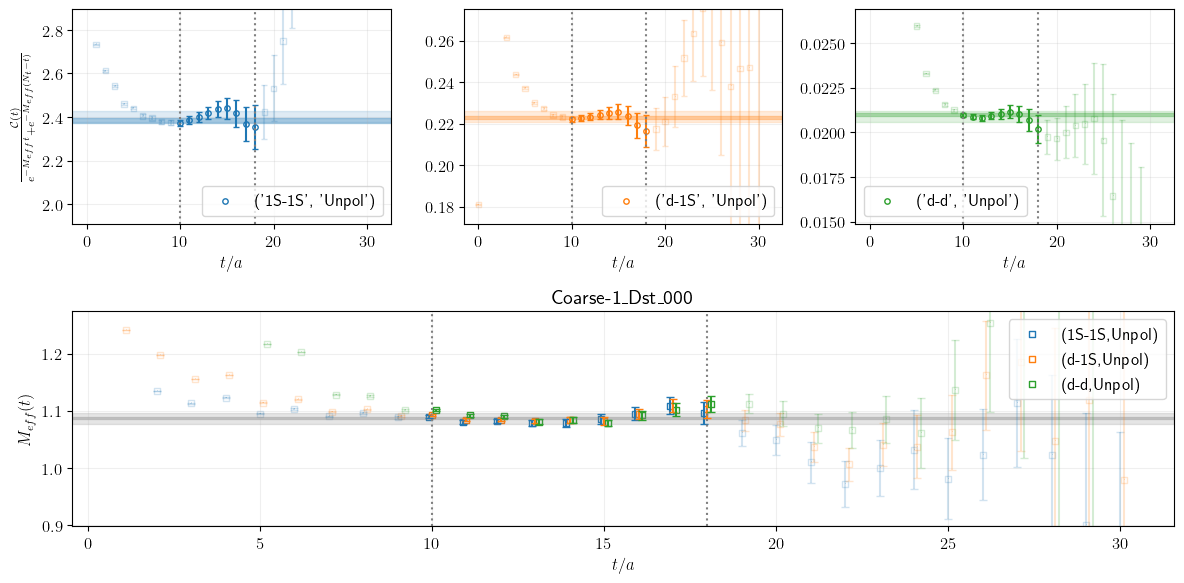

In [7]:
toplot = stag.meff(TRANGE_EFF,**cov_specs,plottable=True)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 6 if len(stag.keys)/len(SMSLIST)==1 else 8))
plot_effective_coeffs(TRANGE_EFF,Aknob=20,*toplot)

plt.title(f'{ENSEMBLE}_{MESON}_{MOMENTUM}')

plt.tight_layout()

plt.show()


Here we set priors

In [99]:
effa

BufferDict({('1S-1S', 'Bot'): 0.637(24), ('1S-1S', 'Par'): 0.862(28), ('d-1S', 'Bot'): 0.1126(27), ('d-1S', 'Par'): 0.1480(33), ('d-d', 'Bot'): 0.02011(45), ('d-d', 'Par'): 0.02502(54)})

In [100]:
priors = stag.priors(NSTATES,Meff=effm,Aeff=effa)
priors 

{'E': [1.347(56), -1.66(58), -0.93(84), -2.2(2.5), -2.2(2.5), -2.2(2.5)],
 'Z_1S_Bot': [-0.2(1.0), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_1S_Par': [-0.07(1.00), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d-1S_Bot': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d-1S_Par': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d_Bot': [-2.0(1.0), -3.0(1.5), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d_Par': [-1.8(1.0), -5.5(2.0), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)]}

Now we perform the fit

In [101]:
fit = stag.fit(
    Nstates = NSTATES,
    trange  = TRANGE,
    priors  = priors,
    verbose = False,
    **cov_specs
)

In [102]:
fitres = stag.fit_result(
    NSTATES,
    TRANGE,
    verbose = True,
    priors  = priors if WPRIORS else None
)

# ---------- 3+3 fit in (4, 18) for mes: Dst of ens: MediumCoarse for mom: 300 --------------
Least Square Fit:
  chi2/dof [dof] = 0.81 [90]    Q = 0.9    logGBF = 1560.6

Parameters:
            E 0    1.379 (13)     [   1.347 (56) ]  
              1    -2.47 (42)     [   -1.66 (58) ]  *
              2    -1.34 (63)     [   -0.93 (84) ]  
              3    -1.68 (35)     [   -2.2 (2.5) ]  
              4    -0.59 (20)     [   -2.2 (2.5) ]  
              5    -0.64 (22)     [   -2.2 (2.5) ]  
     Z_1S_Bot 0   -0.011 (84)     [   -0.2 (1.0) ]  
              1    -0.19 (24)     [   -1.2 (1.2) ]  
              2     0.73 (32)     [    0.5 (1.5) ]  
              3     0.49 (69)     [    0.5 (1.5) ]  
              4     1.85 (51)     [    0.5 (3.0) ]  
              5     1.82 (63)     [    0.5 (3.0) ]  
     Z_1S_Par 0    0.111 (88)     [ -0.07 (1.00) ]  
              1    -0.62 (26)     [   -1.2 (1.2) ]  
              2     0.93 (35)     [    0.5 (1.5) ]  
              3     

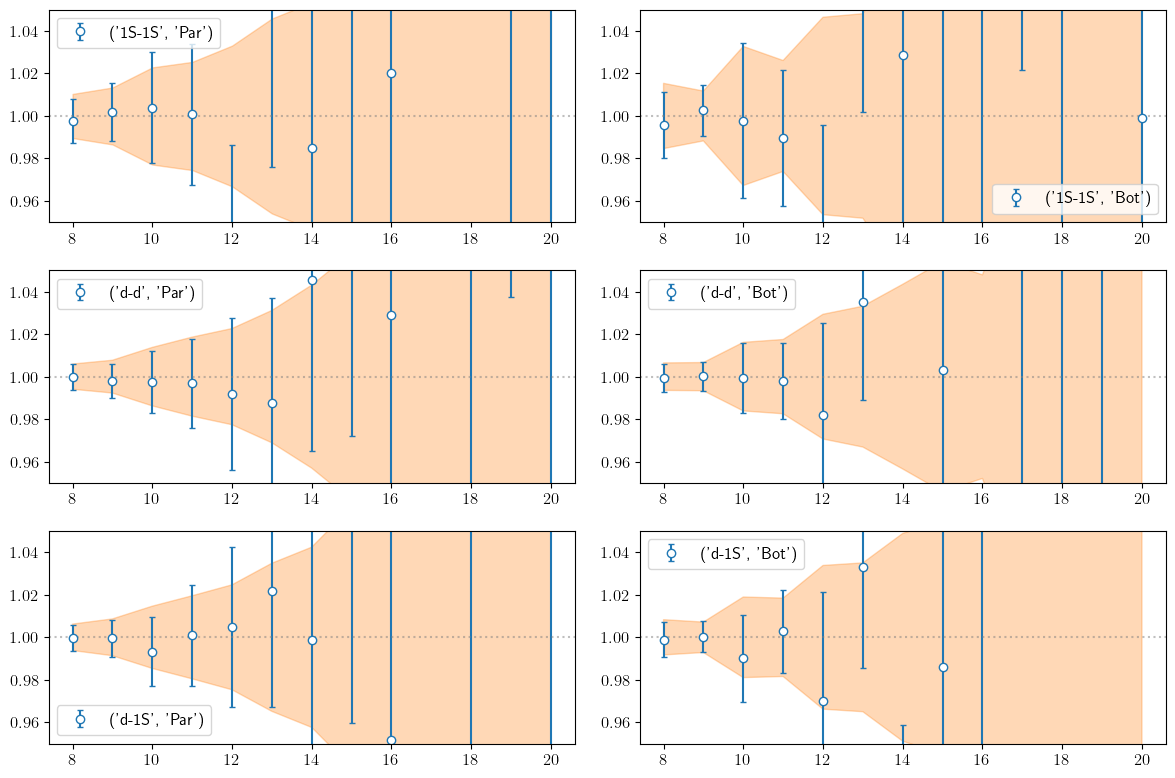

In [93]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

npol = len(stag.keys)//len(SMSLIST)
f, ax = plt.subplots(3,npol,figsize=(12,8))
stag.plot_fit(ax,NSTATES,TRANGE)

plt.tight_layout()